<a href="https://colab.research.google.com/github/MaricelaMH/Simulacion-1/blob/main/Acierto_error_MC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
# Importamos las paqueterias necesarias
import numpy as np
import matplotlib.pyplot as plt

In [47]:
# Definimos nuestra función g(x)
def g(x):
    return np.sqrt(np.arctan(x))

In [48]:
# Aplicamos el método de Monte Carlo de acierto y error
def monte_carlo_aci_error(a, b, num_puntos):

    # Generamos nuestros puntos aleatorios (x_i, y_i)
    x_puntos = np.random.uniform(a, b, num_puntos)
    y_max = g(b)  # Suponemos que g(x) está acotada
    y_puntos = np.random.uniform(0, y_max, num_puntos)

    # Contamos los puntos caen debajo de la curva g(x)
    abajo_curva = y_puntos < g(x_puntos)
    aux_num = np.sum(abajo_curva)

    # Estimamos el área bajo la curva
    area_curv = (b - a) * y_max
    integral_est = (aux_num / num_puntos) * area_curv

    return integral_est


In [55]:
# Calculamos la estimación de la integral
integral_estimate = monte_carlo_aci_error(0, 1, 10000)
print(f"Estimación de la integral: {integral_estimate}")

Estimación de la integral: 0.629486985149094


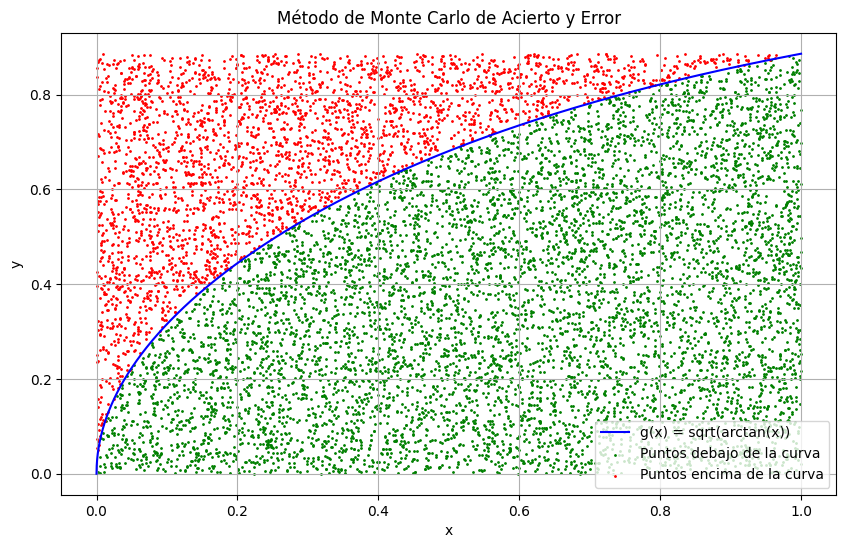

In [56]:
# Graficamos los puntos y la función g(x)
# Parámetros de la integral
x = np.linspace(0,1,10000)
y = g(x)
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='g(x) = sqrt(arctan(x))', color='blue')

# Generamos puntos aleatorios (x_i, y_i) para la visualización
x_puntos = np.random.uniform(1, 0, 10000)
y_puntos = np.random.uniform(0, g(1), 10000)
curva = y_puntos < g(x_puntos)
plt.scatter(x_puntos[curva], y_puntos[curva], color='green', s=1, label='Puntos debajo de la curva')
plt.scatter(x_puntos[~curva], y_puntos[~curva], color='red', s=1, label='Puntos encima de la curva')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Método de Monte Carlo de Acierto y Error')
plt.legend()
plt.grid(True)
plt.show()
